In [1]:
%matplotlib inline
#%matplotlib widget

In [100]:
#############imports######################################################################
import cv2 as cv2
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import trackpy as tp
import scipy as sc
import math
import matplotlib.colors as colors
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import os
from ipywidgets import HBox, Textarea, interact

In [35]:
def read_time(time_value):
    fps=25
    sign_index=time_value.index(':')
    minutes=int(time_value[0:sign_index])
    sec=int(time_value[sign_index+1:len(time_value)])
    frames=(minutes*60+sec)*25
    return frames
def expShift(t,A,tau,k):
    return A*np.exp(-(t**2)/((tau**2)))+k
#def CovToCorr(cov_data):
#    shape=cov_data.shape
#    result=[]
#    for i in range(0,shape):
        

In [4]:
expSumFileNamePassive='C:\\Users\\User\\Documents\\Eden\\locate_git_code\\packaged\\expSumPack21.csv'
expSumPassive=pd.read_csv(expSumFileNamePassive,index_col=0)
#expSumPassive=expSumPassive[(expSumPassive['bots']!=8)]
suffix='_distances.csv'
passive_path='C:\\Users\\User\\Documents\\Eden\\locate_git_code\\distances'
close_threshold={7:55**2,12:74**2,18:89**2,28:140**2,32:146**2}
too_close_thresh={7:18**2,12:35**2,18:60**2,28:100**2,32:100**2}
countdf=pd.DataFrame()
#bot_nums=pd.DataFrame()
bottypes=['fronter','aligner']
for bottype in bottypes:
    relevant_table=expSumPassive[(expSumPassive['bottype']==bottype)]
    #bot_num_array=pd.Series([]);
    bot_diam_before=0
    bot_iteration=0
    for index,row in relevant_table.iterrows():
        try:
            FileName=row.locatingFileNamePack
            bot_diam_current=row['passiveDiameter[cm]']
            if bot_diam_current==bot_diam_before:

                bot_iteration=bot_iteration+1
            else:
                bot_iteration=0
            #bot_num_array[index]=row.bots
            print(FileName)
            srtarting_frame=read_time(row.start_min)
            passiveDiameter=row['passiveDiameter[cm]']
            data=pd.read_csv(passive_path+'\\'+FileName+suffix,index_col=0)
            cond = (data.distance_sq<=close_threshold[passiveDiameter])&(data.distance_sq>too_close_thresh[passiveDiameter])
            dataCond = data[cond]
            #data['hascond']=np.where(cond,True,False)
            dataCG=dataCond.groupby(['frame'], as_index=True).count()
            dataCG.to_csv(passive_path+'\\dataCG_test.csv')
            data_count=pd.DataFrame(data={'frame': list(range(0,int(data.frame.iloc[-1])))})
            data_count['kissing_count']=dataCG.distance_sq
            data_count['kissing_count'] =data_count['kissing_count'].fillna(0)
            data_count_relevant=data_count.iloc[srtarting_frame:len(data_count)].reset_index()

            data_count_relevant['iteration']=np.ones(len(data_count_relevant))*bot_iteration
            data_count_relevant['passiveDiameter[cm]']=np.ones(len(data_count_relevant))*passiveDiameter
            bottype_array=[bottype]*len(data_count_relevant)
            data_count_relevant['bot_type']=bottype_array
            countdf=pd.concat([countdf,data_count_relevant],axis=0)
            bot_diam_before=bot_diam_current
        except:
            print("An exception occurred")
    #bot_nums=pd.concat([bot_nums,bot_num_array.rename(bottype)],axis=1)
#countdf.fillna(0,inplace=True)
countdf.to_csv(passive_path+'\\countdf21_test.csv')

fronter_N021_D007_C0541.MP4_loc.csv
fronter_N021_D007_C0540.MP4_loc.csv
fronter_N021_D007_C0539.MP4_loc.csv
fronter_N021_D007_C0538.MP4_loc.csv
fronter_N021_D012_C0537.MP4_loc.csv
fronter_N021_D012_C0536.MP4_loc.csv
fronter_N021_D012_C0535.MP4_loc.csv
An exception occurred
fronter_N021_D012_C0534.MP4_loc.csv
fronter_N021_D012_C0533.MP4_loc.csv
fronter_N021_D018_C0521.MP4_loc.csv
fronter_N021_D018_C0519.MP4_loc.csv
fronter_N021_D018_C0514.MP4_loc.csv
fronter_N021_D018_C0516.MP4_loc.csv
fronter_N021_D018_C0517.MP4_loc.csv
fronter_N021_D028_C0490.MP4_loc.csv
fronter_N021_D028_C0491.MP4_loc.csv
fronter_N021_D028_C0492.MP4_loc.csv
fronter_N021_D028_C0493.MP4_loc.csv
fronter_N021_D032_C0500.MP4_loc.csv
fronter_N021_D032_C0501.MP4_loc.csv
fronter_N021_D032_C0502.MP4_loc.csv
fronter_N021_D032_C0503.MP4_loc.csv
aligner_N021_D007_C0548.MP4_loc.csv
aligner_N021_D007_C0547.MP4_loc.csv
aligner_N021_D007_C0544.MP4_loc.csv
aligner_N021_D007_C0542.MP4_loc.csv
aligner_N021_D012_C0532.MP4_loc.csv
aligne

In [5]:
#expSumPassive=expSumPassive[(expSumPassive['bots']!=8)]
fronters_count=countdf[(countdf['bot_type']=='fronter')].reset_index()
fronters_count.to_csv(passive_path+'\\fronters21_count.csv')
aligners_count=countdf[(countdf['bot_type']=='aligner')].reset_index()
aligners_count.to_csv(passive_path+'\\aligners21_count.csv')


for iteration 0 t half life:1.963568136503863
for iteration 1 t half life:2.5719535525677153
for iteration 2 t half life:2.418757973428285
for iteration 3 t half life:3.219978384621938


(0.0, 100.0, 0.0, 25.0)

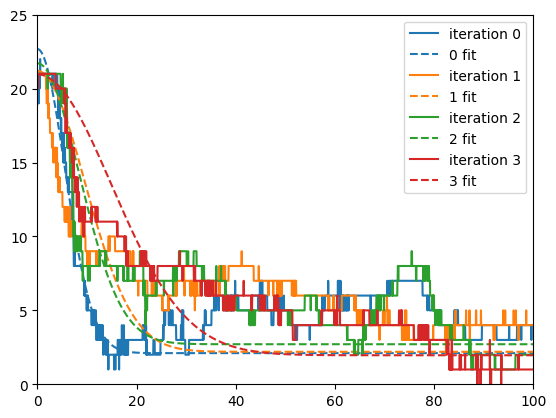

In [29]:
test=fronters_count[(fronters_count['passiveDiameter[cm]']==32)]
fig = plt.figure()
ax = plt.axes()
for t in [0,1,2,3]:
    current_test=test[(test['iteration']==t)]
    current_test.set_index(current_test['level_0'],inplace=True)
    relevant_column=current_test['kissing_count']
    x=current_test['level_0']/25
    color = next(ax._get_lines.prop_cycler)['color']
    plt.plot(x,relevant_column,label='iteration {}'.format(t),color=color)
    p0=np.array([20,800,2])
    #p0=np.array([10000000000,2,500])
    popt,pcov = sc.optimize.curve_fit(expShift,x,relevant_column,p0=p0,bounds=((19, 0, 0), (21,np.inf, np.inf)))
    perr = np.sqrt(np.diag(pcov))
    plt.plot(x,expShift(x,*popt),label='{:d} fit'.format(t),color=color,linestyle='--')
    t_half_life=np.sqrt(popt[1]*np.log(2))
    print('for iteration {} t half life:{}'.format(t,t_half_life))
plt.legend()
plt.axis([0,1E2,0,25])    

for mean t half life:23.548200450309494


C:\Users\User\AppData\Local\Temp\ipykernel_41292\3160691440.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fronter_mean=fronters_count.groupby(['passiveDiameter[cm]','level_0']).mean()


(0.0, 1000.0, 0.0, 25.0)

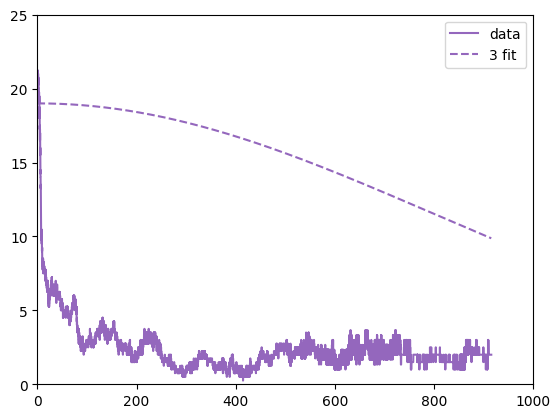

In [30]:
I=25*2
fronter_mean=fronters_count.groupby(['passiveDiameter[cm]','level_0']).mean()
#print(fronter_mean)
test1=fronter_mean.loc[32]
#print(test1)
x=(test1.index.values)/25
y=test1['kissing_count']#.rolling(I).mean()
y=y.dropna()
x=(y.index.values)/25
color = next(ax._get_lines.prop_cycler)['color']
plt.plot(x,y,label='data',color=color)
p0=np.array([20,8000,2])
#p0=np.array([10000000,2,500])
popt,pcov = sc.optimize.curve_fit(expShift,x,y,p0=p0,bounds=((19,800,0),(21,np.inf,np.inf)))
perr = np.sqrt(np.diag(pcov))
plt.plot(x,expShift(x,*popt),label='{:d} fit'.format(t),color=color,linestyle='--')
t_half_life=np.sqrt(popt[1]*np.log(2))
print('for mean t half life:{}'.format(t_half_life))
plt.legend()
plt.axis([0,1E3,0,25])  

t half life:7.4
555.0
Ksss:2.2519858156028367 Kss_std:1.110660861345083


C:\Users\User\AppData\Local\Temp\ipykernel_41292\3288095962.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fronter_mean=fronters_count.groupby(['passiveDiameter[cm]','level_0']).mean()


(0.0, 100.0, 0.0, 25.0)

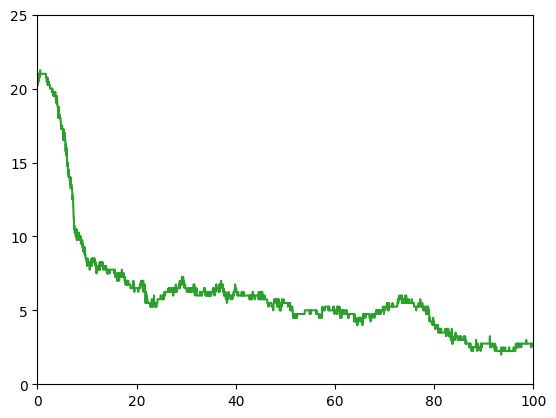

In [9]:
I=25*2
fronter_mean=fronters_count.groupby(['passiveDiameter[cm]','level_0']).mean()
test1=fronter_mean.loc[32]
x=(test1.index.values)/25
y=test1['kissing_count']#.rolling(I).mean()
y=y.dropna()
x=(y.index.values)/25
color = next(ax._get_lines.prop_cycler)['color']
plt.plot(x,y,label='data',color=color)
cond=y<=(21/2)
test2=y[cond]
t_half_life_array=(test2.index.values)/25
print('t half life:{}'.format(t_half_life_array[0]))
print(t_half_life_array[0]*25*3)
test3=y.iloc[int(t_half_life_array[0]*25*3):len(y)]
Ksss=test3.mean()
Kss_std=test3.std()
print('Ksss:{} Kss_std:{}'.format(Ksss,Kss_std))
plt.axis([0,1E2,0,25])

In [10]:
fronter_mean=fronters_count.groupby(['passiveDiameter[cm]','level_0']).mean()
fronter_std=fronters_count.groupby(['passiveDiameter[cm]','level_0']).std()

aligners_mean=aligners_count.groupby(['passiveDiameter[cm]','level_0']).mean()
aligners_std=aligners_count.groupby(['passiveDiameter[cm]','level_0']).std()

C:\Users\User\AppData\Local\Temp\ipykernel_41292\1034573754.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fronter_mean=fronters_count.groupby(['passiveDiameter[cm]','level_0']).mean()
C:\Users\User\AppData\Local\Temp\ipykernel_41292\1034573754.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fronter_std=fronters_count.groupby(['passiveDiameter[cm]','level_0']).std()
C:\Users\User\AppData\Local\Temp\ipykernel_41292\1034573754.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_on

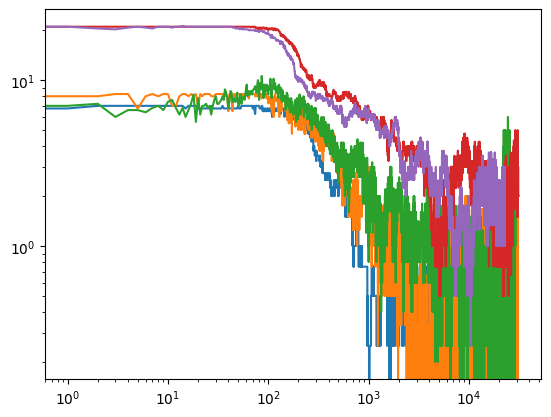

In [11]:
for i in [7,12,18,28,32]:
    current_data=fronter_mean.loc[i]
    #print(current_data)
    plt.loglog(current_data['kissing_count'])
#test=pd.DataFrame(fronter_mean.loc[1])

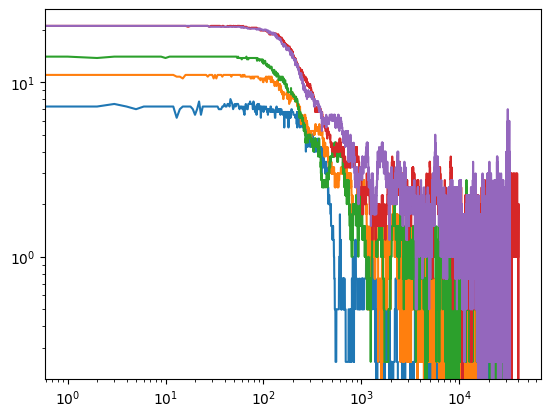

In [12]:
for j in [7,12,18,28,32]:
    current_data_aligners=aligners_mean.loc[j]
    #print(current_data)
    plt.loglog(current_data_aligners['kissing_count'])

## mean according to mooving

## fronters

190.24
for iteration 7 t-half life:15.854985656563432
0.23903279858672066
175.68
for iteration 12 t-half life:14.640791674620804
0.2548905520313418
124.96
for iteration 18 t-half life:10.415112438417891
0.27591991171447855
168.04
for iteration 28 t-half life:14.003742948062255
0.26879774344912866
124.92
for iteration 32 t-half life:10.412826518062548
0.2545890852288714


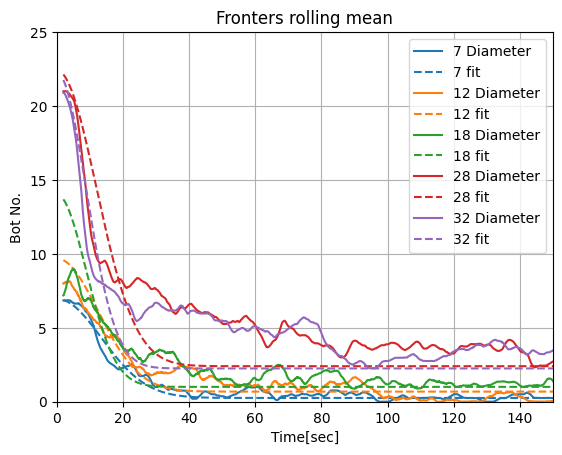

In [182]:
I=25*2
path='C:\\Users\\User\\Documents\\Eden\\locate_git_code\\distances'
fig = plt.figure()
ax = plt.axes()
#bot_num_diam={7:8,12:11,18:15,28:21,32:21}
bot_num_diam={7:[6,9],12:[9,13],18:[13,17],28:[20,20.5],32:[20,20.5]}
#ax.set_xscale("log")
passive_diameter = [7,12,18,28,32]
ksss_fron = []
ksss_err_fron=[]
half_time_fron=[]
half_time_err_fron=[]
ss_time_fron=[]
data_fit=pd.DataFrame()
for i in passive_diameter:
#for i in [4]:
    current_data=fronter_mean.loc[i]
    current_data_std=fronter_std.loc[i]
    fronters_count_mean_window=current_data['kissing_count'].rolling(I).mean()
    fronters_count_mean_window=fronters_count_mean_window.dropna()
    t=(fronters_count_mean_window.index.values)/25
    #x=np.arange(t[-1])/25
    p0=np.array([bot_num_diam[i][0],80,2])
    popt,pcov = sc.optimize.curve_fit(expShift,t,fronters_count_mean_window,bounds=((bot_num_diam[i][0],0,0), (bot_num_diam[i][1],np.inf, np.inf)),p0=p0)
    perr = np.sqrt(np.diag(pcov))
    corr=np.corrcoef(pcov,rowvar=True)
    #print(fronters_count_mean_window)
    #fronters_count_std_window=fronter_std['distance_sq'].rolling(I).mean()
    #print(fronters_count_std_window)
    #print(current_data)
    color = next(ax._get_lines.prop_cycler)['color']
    plt.plot(t,fronters_count_mean_window,label='{:d} Diameter'.format(i),color=color)
    plt.plot(t,expShift(t,*popt),label='{:d} fit'.format(i),color=color,linestyle='--')
    #print('fit={}'.format(popt))
    #print('cov={}'.format(pcov))
    #print('err={}'.format(perr))
    #print(corr)
    cond_half=fronters_count_mean_window<=(bot_num_diam[i][1]/2)
    cond_half_data=fronters_count_mean_window[cond_half]
    t_half_life_array=(cond_half_data.index.values)/25
    #t_half_life=t_half_life_array[0]#popt[1]*np.log(2)
    t_half_life=popt[1]*np.sqrt(np.log(2))
    
    kissingStart = int(t_half_life*25*3)
    kissingStop = int(t_half_life*25*12)
    print(kissingStop/25)
    
    #Kss_data=fronters_count_mean_window.iloc[int(t_half_life*25*3):len(fronters_count_mean_window)]
    Kss_data=fronters_count_mean_window.iloc[kissingStart:kissingStop]
    
    ksss_fron.append(Kss_data.mean())
    ksss_err_fron.append(Kss_data.std()/2)
    cond_ss=(fronters_count_mean_window<=Kss_data.mean())
    cond_ss_data=fronters_count_mean_window[cond_ss]
    t_ss_array=(cond_ss_data.index.values)/25
    ss_time_fron.append(t_ss_array[0])
    half_time_fron.append(popt[1]*np.sqrt(np.log(2)))
    #half_time_fron.append(t_half_life)
    half_time_err_fron.append(perr[1]*np.sqrt(np.log(2)))
    file_path=path+'\\results_21bots\\fronters\\{}_bots'.format(i)
    isExist = os.path.exists(file_path)
    if not isExist:

   # Create a new directory because it does not exist
        os.makedirs(file_path)
    data_fit['t']=t
    data_fit['fronters_count']=fronters_count_mean_window
    data_fit['fit']=expShift(t,*popt)
    data_fit.to_csv(file_path+'\\data_fit.csv'.format(i))
    popt.tofile(file_path+'\\popt.csv'.format(i))
    p0.tofile(file_path+'\\p0.csv'.format(i))
    pcov.tofile(file_path+'\\pcov.csv'.format(i))
    corr.tofile(file_path+'\\corr.csv'.format(i))
    data_fit=pd.DataFrame()
    print('for iteration {} t-half life:{}'.format(i,popt[1]*np.sqrt(np.log(2))))
    print(np.sqrt(perr[1]*np.sqrt(np.log(2))))
ax.legend()
plt.title('Fronters rolling mean')
plt.xlabel('Time[sec]')
plt.ylabel('Bot No.')
    #ax.errorbar(list(range(0,len(fronters_count_mean_window))),fronters_count_mean_window,yerr=fronters_count_std_window,ecolor='yellow',color='olive',alpha=0.9)
plt.axis([0,1.5E2,0,25])#25])
plt.grid()
fig.savefig('C:\\Users\\User\\Documents\\Eden\\locate_git_code\\production\\fronters_rolling_mean.png',bbox_inches='tight')

## aligners

147.24
for iteration 7 t half life:14.448008108811397
0.03950421736700067
173.36
for iteration 12 t half life:18.555791367156058
0.06282794066966248
222.64
for iteration 18 t half life:11.40377365467082
0.04279484816595187
136.84
for iteration 28 t half life:11.934354971687053
0.03781385993090299
143.2
for iteration 32 t half life:12.270592677831424
0.047105529746360585


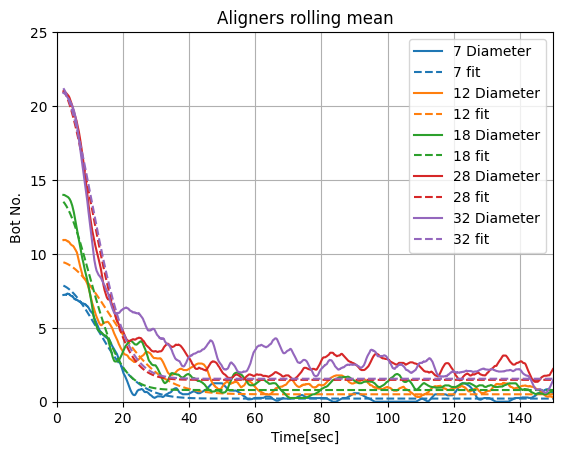

In [184]:
I=25*2
fig = plt.figure()
ax = plt.axes()
path='C:\\Users\\User\\Documents\\Eden\\locate_git_code\\distances'
bot_num_diam={7:[6,9],12:[9,13],18:[13,17],28:[20,20.5],32:[20,20.5]}
#ax.set_xscale("log")
passive_diameter = [7,12,18,28,32]
#ax.set_xscale("log")
ksss_align = []
ksss_err_align=[]
half_time_align=[]
half_time_err_align=[]
data_fit=pd.DataFrame()
ss_time_align=[]
for i in passive_diameter:
#for i in [21]:
    current_data=aligners_mean.loc[i]
    current_data_std=aligners_std.loc[i]
    alingers_count_mean_window=current_data['kissing_count'].rolling(I).mean()
    alingers_count_mean_window=alingers_count_mean_window.dropna()
    t=(alingers_count_mean_window.index.values)/25
    #x=np.arange(len(alingers_count_mean_window))
    p0=np.array([bot_num_diam[i][0],80,2])
    popt,pcov = sc.optimize.curve_fit(expShift,t,alingers_count_mean_window,bounds=((bot_num_diam[i][0],0,0), (bot_num_diam[i][1],np.inf, np.inf)),p0=p0)
    perr = np.sqrt(np.diag(pcov))
    corr=np.corrcoef(pcov,rowvar=True)
    #print(alingers_count_mean_window)
    #fronters_count_std_window=fronter_std['distance_sq'].rolling(I).mean()
    #print(fronters_count_std_window)
    #print(current_data)
    color = next(ax._get_lines.prop_cycler)['color']
    plt.plot(t,alingers_count_mean_window,label='{:d} Diameter'.format(i),color=color)
    plt.plot(t,expShift(t,*popt),label='{:d} fit'.format(i),color=color,linestyle='--')
    cond_half=alingers_count_mean_window<=(bot_num_diam[i][1]/2)
    cond_half_data=alingers_count_mean_window[cond_half]
    #t_half_life_array=(cond_half_data.index.values)/25
    #t_half_life=t_half_life_array[0]
    kissingStart = int(t_half_life*25*3)
    kissingStop = int(t_half_life*25*12)
    print(kissingStop/25)
    t_half_life=popt[1]*np.sqrt(np.log(2))
    Kss_data=alingers_count_mean_window.iloc[kissingStart:kissingStop]
    ksss_align.append(Kss_data.mean())
    ksss_err_align.append(Kss_data.std()/2)
    cond_ss=(alingers_count_mean_window<=Kss_data.mean())
    cond_ss_data=alingers_count_mean_window[cond_ss]
    t_ss_array=(cond_ss_data.index.values)/25
    ss_time_align.append(t_ss_array[0])
    half_time_align.append(popt[1]*np.sqrt(np.log(2)))
    half_time_err_align.append(perr[1]*np.sqrt(np.log(2)))
    ax.legend()
    file_path=path+'\\results_21bots\\aligners\\{}_bots'.format(i)
    isExist = os.path.exists(file_path)
    if not isExist:

   # Create a new directory because it does not exist
        os.makedirs(file_path)
    data_fit['t']=t
    data_fit['alighners_count']=alingers_count_mean_window
    data_fit['fit']=expShift(t,*popt)
    data_fit.to_csv(file_path+'\\data_fit.csv'.format(i))
    popt.tofile(file_path+'\\popt.csv'.format(i))
    p0.tofile(file_path+'\\p0.csv'.format(i))
    pcov.tofile(file_path+'\\pcov.csv'.format(i))
    corr.tofile(file_path+'\\corr.csv'.format(i))
    data_fit=pd.DataFrame()
    print('for iteration {} t half life:{}'.format(i,popt[1]*np.sqrt(np.log(2))))
    print(perr[1]*np.sqrt(np.log(2)))
plt.title('Aligners rolling mean')
plt.xlabel('Time[sec]')
plt.ylabel('Bot No.')
    #ax.errorbar(list(range(0,len(fronters_count_mean_window))),fronters_count_mean_window,yerr=fronters_count_std_window,ecolor='yellow',color='olive',alpha=0.9)
plt.axis([0,1.5E2,0,25])
plt.grid()
fig.savefig('C:\\Users\\User\\Documents\\Eden\\locate_git_code\\production\\aligners_rolling_mean.png',bbox_inches='tight')

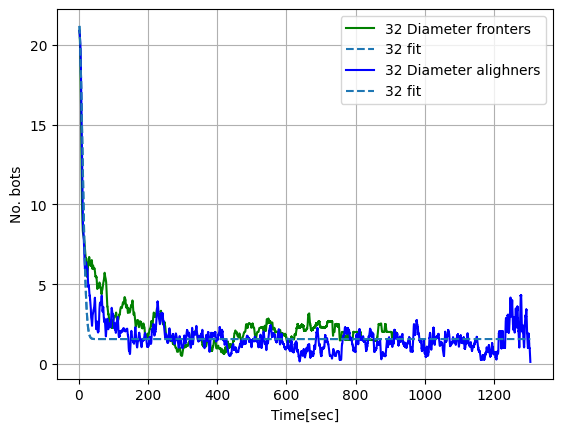

In [172]:
fig = plt.figure()
ax = plt.axes()
t=(fronters_count_mean_window.index.values)/25
plt.plot(t,fronters_count_mean_window,label='{:d} Diameter fronters'.format(i),color='green')
plt.plot(t,expShift(t,*popt),label='{:d} fit'.format(i),color=color,linestyle='--')
t=(alingers_count_mean_window.index.values)/25
#color = next(ax._get_lines.prop_cycler)['color']
plt.plot(t,alingers_count_mean_window,label='{:d} Diameter alighners'.format(i),color='blue')
plt.plot(t,expShift(t,*popt),label='{:d} fit'.format(i),color=color,linestyle='--')
ax.legend()
plt.xlabel('Time[sec]')
plt.ylabel('No. bots')
plt.grid()
fig.savefig('C:\\Users\\User\\Documents\\Eden\\locate_git_code\\production\\32_fronters_alighners.png',bbox_inches='tight')

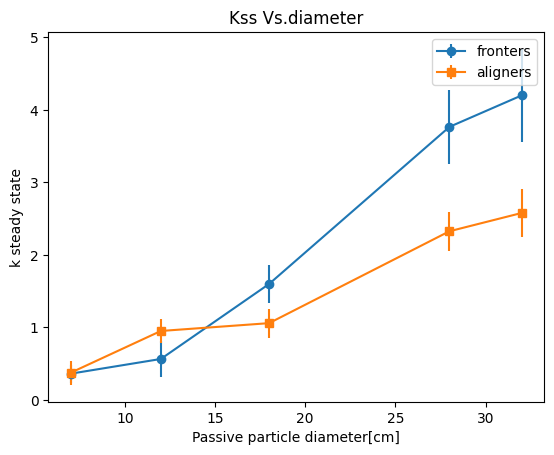

In [185]:
path_figure=path+'\\results_21bots'
fig = plt.figure()
ax = plt.axes()
ksss_fron = np.array(ksss_fron)
passive_diameter = np.array(passive_diameter)
ksss_align=np.array(ksss_align)
ksss_err_fron=np.array(ksss_err_fron)
ksss_err_align=np.array(ksss_err_align)
ax.errorbar(x=passive_diameter,y=ksss_fron,yerr=ksss_err_fron,label='fronters',marker='o')
ax.errorbar(x=passive_diameter,y=ksss_align,yerr=ksss_err_align,label='aligners',marker='s')
ax.legend()
plt.xlabel('Passive particle diameter[cm]')
plt.ylabel('k steady state')
plt.title('Kss Vs.diameter')
plt.savefig('foo.png')

Text(0.5, 1.0, 't half life Vs. diameter')

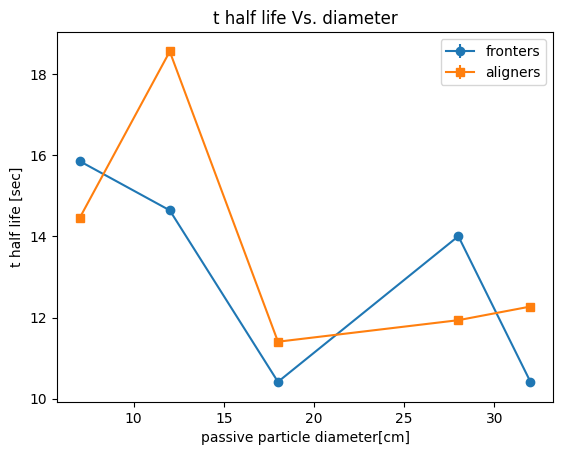

In [186]:
fig = plt.figure()
ax2 = plt.axes()
half_time_fron=np.array(half_time_fron)
half_time_err_fron=np.array(half_time_err_fron)
half_time_align=np.array(half_time_align)
half_time_err_align=np.array(half_time_err_align)
ax2.errorbar(x=passive_diameter,y=half_time_fron,yerr=half_time_err_fron,label='fronters',marker='o')
ax2.errorbar(x=passive_diameter,y=half_time_align,yerr=half_time_err_align,label='aligners',marker='s')
ax2.legend()
plt.xlabel('passive particle diameter[cm]')
plt.ylabel('t half life [sec]')
plt.title('t half life Vs. diameter')

Text(0.5, 1.0, 't steady state Vs. diameter')

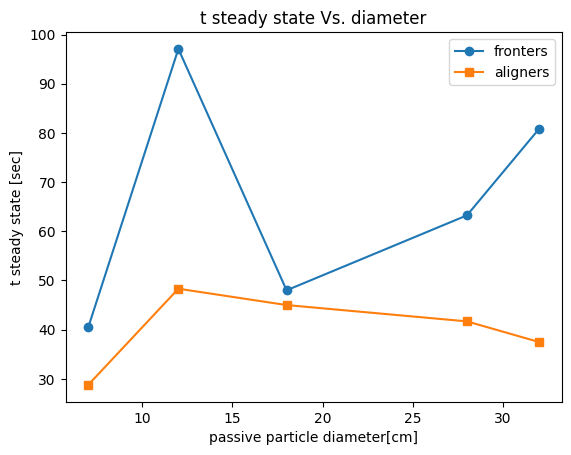

In [187]:
fig = plt.figure()
ax2 = plt.axes()
ss_time_fron=np.array(ss_time_fron)
ss_time_align=np.array(ss_time_align)
plt.plot(passive_diameter,ss_time_fron,label='fronters',marker='o')
plt.plot(passive_diameter,ss_time_align,label='aligners',marker='s')
ax2.legend()
plt.xlabel('passive particle diameter[cm]')
plt.ylabel('t steady state [sec]')
plt.title('t steady state Vs. diameter')

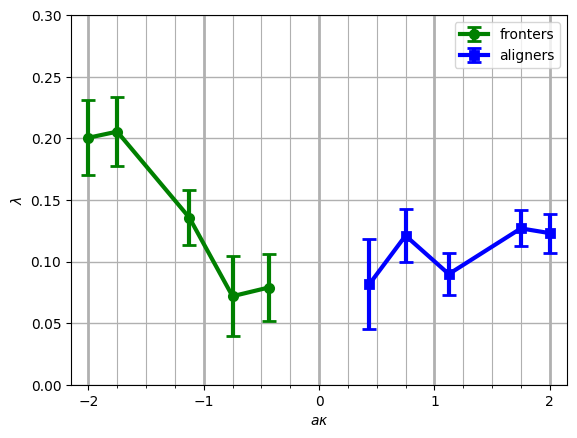

In [188]:
fig = plt.figure()
ax2 = plt.axes()
a=passive_diameter
b=np.ones(len(a))*4.8
kappa=np.ones(len(a))*0.3
kappa_fronters=np.ones(len(a))*-0.3
pi=np.ones(len(a))*math.pi
x=a/b*kappa
x_fronters=a/b*kappa_fronters
y_fron=ksss_fron*b/(a*pi)
y_fron_err=ksss_err_fron*b/(a*pi)
y_align=ksss_align*b/(a*pi)
y_align_err=ksss_err_align*b/(a*pi)
ax2.errorbar(x_fronters,y_fron,yerr=y_fron_err,label='fronters',marker='o',capsize=5,color='green'
             ,markeredgewidth=2,elinewidth=3,linewidth=3)
ax2.errorbar(x,y_align,yerr=y_align_err,label='aligners',marker='s',capsize=5,color='blue'
             ,markeredgewidth=2,elinewidth=3,linewidth=3)
ax2.legend(loc='upper right')
plt.xlabel(r'$a\kappa$')
plt.ylabel(r'$\lambda$')
plt.xlim([-2.15, 2.15])
plt.ylim([0,0.3])
ax2.xaxis.set_major_locator(MultipleLocator(1))
ax2.xaxis.set_minor_locator(MultipleLocator(0.25))
ax2.xaxis.grid(True,'major',linewidth=2)
ax2.xaxis.grid(True,'minor')
#ax2.set_xticks(np.arange(0,2.15,0.25))
ax2.yaxis.set_major_locator(MultipleLocator(0.05))
ax2.yaxis.grid(True,'major',linewidth=1)
data=pd.DataFrame()
data['x_fronters [diameter_kappa]']=x_fronters
data['y_fronters_density']=y_fron
data['fronter_error']=y_fron_err
data['x_aligners[diameter_kappa]']=x
data['y_aligners_density']=y_align
data['aligner error']=y_align_err
data.to_csv('C:\\Users\\User\\Documents\\Eden\\locate_git_code\\production\\lambda_vs_akappa.csv')
fig.savefig('C:\\Users\\User\\Documents\\Eden\\locate_git_code\\production\\lambda_vs_akappa.png',bbox_inches='tight')

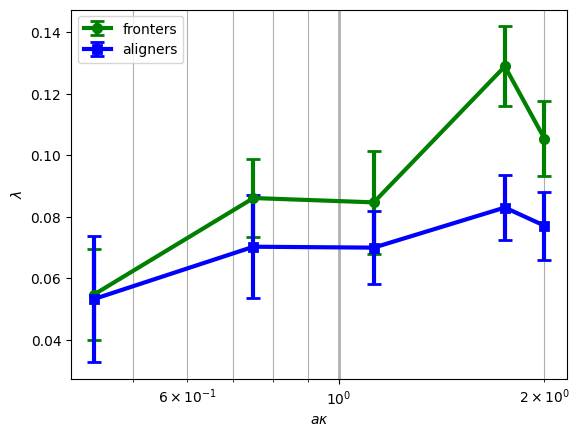

In [115]:
fig = plt.figure()
ax2 = plt.axes()
a=passive_diameter
b=np.ones(len(a))*4.8
kappa=np.ones(len(a))*0.3
pi=np.ones(len(a))*math.pi
x=a/b*kappa
y_fron=ksss_fron*b/(a*pi)
y_fron_err=ksss_err_fron*b/(a*pi)
y_align=ksss_align*b/(a*pi)
y_align_err=ksss_err_align*b/(a*pi)
ax2.errorbar(x,y_fron,yerr=y_fron_err,label='fronters',marker='o',capsize=5,color='green'
             ,markeredgewidth=2,elinewidth=3,linewidth=3)
ax2.errorbar(x,y_align,yerr=y_align_err,label='aligners',marker='s',capsize=5,color='blue'
             ,markeredgewidth=2,elinewidth=3,linewidth=3)
ax2.legend(loc='upper left')
plt.xlabel(r'$a\kappa$')
plt.ylabel(r'$\lambda$')
#plt.xlim([0, 2.15])
#plt.ylim([0,0.16])
ax2.xaxis.set_major_locator(MultipleLocator(20))
ax2.xaxis.set_minor_locator(MultipleLocator(5))
ax2.xaxis.grid(True,'major',linewidth=2)
ax2.xaxis.grid(True,'minor')
ax2.set_xticks([1])
ax2.set_xscale('log')
#ax2.set_yscale('log')
fig.savefig('C:\\Users\\User\\Documents\\Eden\\locate_git_code\\production\\lambda_vs_akappa_log_log.png')